In [5]:
!pip install requests beautifulsoup4 pandas matplotlib lxml


In [6]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import re
from datetime import datetime, timedelta


In [7]:
from urllib.robotparser import RobotFileParser
from urllib.parse import urljoin

def can_scrape(base_url, path="/", user_agent="*"):
    robots_url = urljoin(base_url, "/robots.txt")
    rp = RobotFileParser()
    rp.set_url(robots_url)
    rp.read()
    return rp.can_fetch(user_agent, path)

# Example (change URL later if you use a real site)
base_url = "https://realpython.github.io/fake-jobs/"
print("Allowed to scrape jobs page?", can_scrape(base_url, "/"))


Allowed to scrape jobs page? True


In [8]:
url = "https://realpython.github.io/fake-jobs/"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'lxml')

jobs = []
cards = soup.find_all('div', class_='card-content')

for card in cards:
    title = card.find('h2', class_='title').get_text(strip=True)
    company = card.find('h3', class_='company').get_text(strip=True)
    location = card.find('p', class_='location').get_text(strip=True)
    date = card.find('time')['datetime']
    jobs.append({
        'Title': title,
        'Company': company,
        'Location': location,
        'Posted Date': date
    })

df = pd.DataFrame(jobs)
df.head()


,Title,Company,Location,Posted Date
0,Senior Python Developer,"Payne, Roberts and Davis","Stewartbury, AA",2021-04-08
1,Energy engineer,Vasquez-Davidson,"Christopherville, AA",2021-04-08
2,Legal executive,"Jackson, Chambers and Levy","Port Ericaburgh, AA",2021-04-08
3,Fitness centre manager,Savage-Bradley,"East Seanview, AP",2021-04-08
4,Product manager,Ramirez Inc,"North Jamieview, AP",2021-04-08


In [9]:
# Drop duplicates
df.drop_duplicates(inplace=True)

# Handle missing values
df.dropna(subset=['Title', 'Company'], inplace=True)

# Convert date to datetime
df['Posted Date'] = pd.to_datetime(df['Posted Date'])

df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Title        100 non-null    object        
 1   Company      100 non-null    object        
 2   Location     100 non-null    object        
 3   Posted Date  100 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 3.3+ KB


,Title,Company,Location,Posted Date
0,Senior Python Developer,"Payne, Roberts and Davis","Stewartbury, AA",2021-04-08
1,Energy engineer,Vasquez-Davidson,"Christopherville, AA",2021-04-08
2,Legal executive,"Jackson, Chambers and Levy","Port Ericaburgh, AA",2021-04-08
3,Fitness centre manager,Savage-Bradley,"East Seanview, AP",2021-04-08
4,Product manager,Ramirez Inc,"North Jamieview, AP",2021-04-08


In [10]:
skills = [
    'python', 'java', 'sql', 'excel', 'aws', 'azure', 'docker', 'javascript',
    'html', 'css', 'pandas', 'numpy', 'react', 'node', 'machine learning',
    'data', 'analysis', 'linux'
]

def extract_skills(title):
    title_lower = title.lower()
    found = [skill for skill in skills if skill in title_lower]
    return found

df['Skills'] = df['Title'].apply(extract_skills)
df.head(10)


,Title,Company,Location,Posted Date,Skills
0,Senior Python Developer,"Payne, Roberts and Davis","Stewartbury, AA",2021-04-08,[python]
1,Energy engineer,Vasquez-Davidson,"Christopherville, AA",2021-04-08,[]
2,Legal executive,"Jackson, Chambers and Levy","Port Ericaburgh, AA",2021-04-08,[]
3,Fitness centre manager,Savage-Bradley,"East Seanview, AP",2021-04-08,[]
4,Product manager,Ramirez Inc,"North Jamieview, AP",2021-04-08,[]
5,Medical technical officer,Rogers-Yates,"Davidville, AP",2021-04-08,[]
6,Physiological scientist,Kramer-Klein,"South Christopher, AE",2021-04-08,[]
7,Textile designer,Meyers-Johnson,"Port Jonathan, AE",2021-04-08,[]
8,Television floor manager,Hughes-Williams,"Osbornetown, AE",2021-04-08,[]
9,Waste management officer,"Jones, Williams and Villa","Scotttown, AP",2021-04-08,[]


In [11]:
from collections import Counter

skill_counter = Counter()
for skill_list in df['Skills']:
    skill_counter.update(skill_list)

skill_df = pd.DataFrame(skill_counter.items(), columns=['Skill', 'Count'])
skill_df = skill_df.sort_values(by='Count', ascending=False)
skill_df.head(10)


,Skill,Count
0,python,10
1,data,2


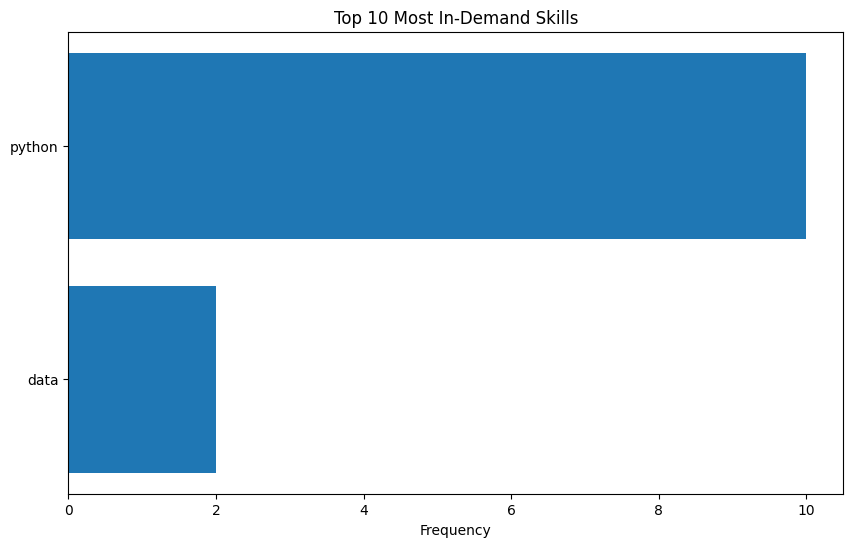

In [12]:
plt.figure(figsize=(10,6))
plt.barh(skill_df['Skill'][:10], skill_df['Count'][:10])
plt.gca().invert_yaxis()
plt.xlabel("Frequency")
plt.title("Top 10 Most In-Demand Skills")
plt.show()


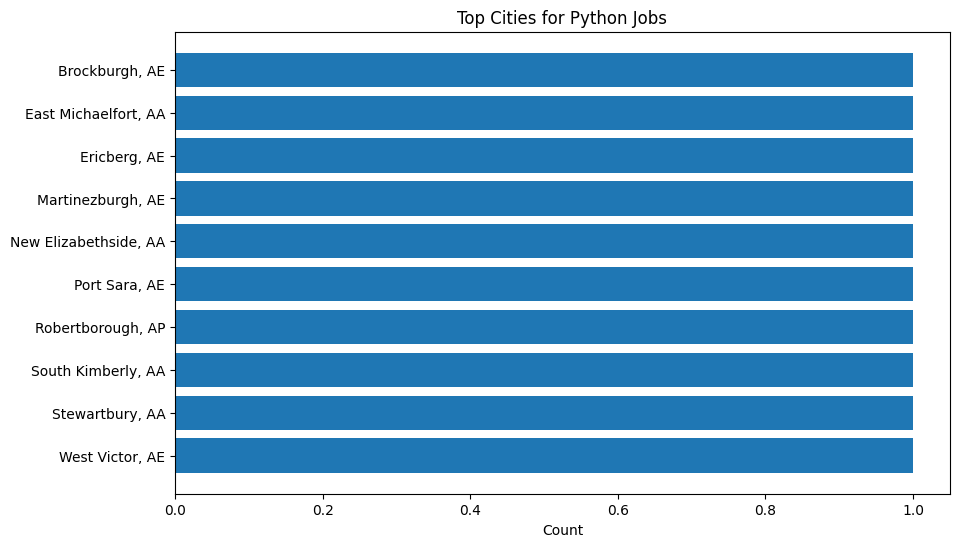

In [13]:
df_exploded = df.explode('Skills')
city_skill = df_exploded.groupby(['Location', 'Skills']).size().reset_index(name='Count')

# Example: top Python cities
python_city = city_skill[city_skill['Skills'] == 'python'].sort_values(by='Count', ascending=False)

plt.figure(figsize=(10,6))
plt.barh(python_city['Location'][:10], python_city['Count'][:10])
plt.gca().invert_yaxis()
plt.title("Top Cities for Python Jobs")
plt.xlabel("Count")
plt.show()


In [14]:
df.to_csv("cleaned_job_postings.csv", index=False)
print("Saved to cleaned_job_postings.csv")


Saved to cleaned_job_postings.csv
